In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold


In [170]:
data = pd.read_csv('dataset.csv')
# data


In [171]:
data.drop('Unnamed: 0',axis = 1, inplace = True)

In [172]:
#label encoding
from sklearn import preprocessing
lbl = preprocessing.LabelEncoder()
data['HairColor'] = lbl.fit_transform(data['HairColor'])
data['Country'] = lbl.fit_transform(data['Country'])


In [173]:
x = data.drop('Outcome',axis = 1)
y = data['Outcome']

In [174]:
#spliting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
x_tr,x_tst,y_tr,y_tst = x_train,x_test,y_train,y_test

In [175]:

from imblearn.combine import SMOTEENN
sm=SMOTEENN()
x_upsampled,y_upsampled=sm.fit_resample(x,y)
x_train,x_test,y_train,y_test = train_test_split(x_upsampled,y_upsampled,test_size=0.2)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((404, 12), (101, 12), (404,), (101,))

In [176]:
#constant feature removal
constant_filter = VarianceThreshold(threshold=0)
constant_filter.fit(x_train)

VarianceThreshold(threshold=0)

In [177]:
constant_list = [not temp for temp in constant_filter.get_support()]
x_train = constant_filter.transform(x_train)
x_test = constant_filter.transform(x_test)
x_train.shape,x_test.shape

((404, 10), (101, 10))

In [178]:
#quasi constant removal
quasi_constant_filter = VarianceThreshold(threshold=0.1)
quasi_constant_filter.fit(x_train)

VarianceThreshold(threshold=0.1)

In [179]:
quasi_constant_filter.get_support().sum()

9

In [180]:
quasi_constant_list = [not temp for temp in quasi_constant_filter.get_support()]
quasi_constant_list 

[False, False, False, False, False, False, False, False, True, False]

In [181]:
x_train = quasi_constant_filter.transform(x_train)
x_test = quasi_constant_filter.transform(x_test)
x_train.shape,x_test.shape

((404, 9), (101, 9))

In [182]:
x_train_T = x_train.T
x_test_T = x_test.T
x_train_T.shape,x_test_T.shape

((9, 404), (9, 101))

In [183]:
x_train_T = pd.DataFrame(x_train_T)
x_test_T = pd.DataFrame(x_test_T)

In [184]:
x_train_T.duplicated().sum()

1

In [185]:
duplicated_features = x_train_T.duplicated()
duplicated_features

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8     True
dtype: bool

In [186]:
features_to_keep = [not data for data in duplicated_features]
features_to_keep

[True, True, True, True, True, True, True, True, False]

In [187]:
x_train_unique = x_train_T[features_to_keep].T
x_test_unique = x_test_T[features_to_keep].T

In [188]:
x_train_unique.shape,x_test_unique.shape

((404, 8), (101, 8))

In [189]:
#Build ML model and compare the performance of the selected feature

def randomForest(x_train,x_test,y_train,y_test):
  model = RandomForestClassifier(n_estimators=100,random_state=0,n_jobs=-1)
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)
  print("Accuracy(Testing Data) : ")
  print(accuracy_score(y_test,y_pred))
  return y_pred,model

In [190]:

%%time
randomForest(x_train_unique,x_test_unique,y_train,y_test)

Accuracy(Testing Data) : 
0.9504950495049505
CPU times: user 236 ms, sys: 28.9 ms, total: 265 ms
Wall time: 346 ms


(array([0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1]),
 RandomForestClassifier(n_jobs=-1, random_state=0))

In [191]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HairColor,Adult,Country,Age_1
0,6,148,72,35,0,33.6,0.627,50,0,1,0,50
1,1,85,66,29,0,26.6,0.351,31,0,1,0,31
2,8,183,64,0,0,23.3,0.672,32,0,1,0,32
3,1,89,66,23,94,28.1,0.167,21,0,1,0,21
4,0,137,40,35,168,43.1,2.288,33,0,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1,1,0,63
764,2,122,70,27,0,36.8,0.340,27,1,1,0,27
765,5,121,72,23,112,26.2,0.245,30,1,1,0,30
766,1,126,60,0,0,30.1,0.349,47,1,1,0,47


In [192]:
# x[]

In [193]:
x_train_unique

,0,1,2,3,4,5,6,7
0,0.0,94.0,70.0,27.0,115.0,43.500000,0.347000,21.0
1,7.0,168.0,88.0,42.0,321.0,38.200000,0.787000,40.0
2,5.0,137.0,108.0,0.0,0.0,48.800000,0.227000,37.0
3,3.0,163.0,70.0,18.0,105.0,31.600000,0.268000,28.0
4,5.0,139.0,80.0,35.0,160.0,31.600000,0.361000,25.0
...,...,...,...,...,...,...,...,...
399,6.0,113.0,66.0,0.0,0.0,33.327330,0.258316,41.0
400,2.0,92.0,62.0,28.0,0.0,31.600000,0.130000,24.0
401,1.0,91.0,54.0,25.0,100.0,25.200000,0.234000,23.0
402,0.0,156.0,0.0,0.0,0.0,38.219939,0.735028,30.0


In [194]:
corrmat = x_train_unique.corr()
corrmat

,0,1,2,3,4,5,6,7
0,1.000000,0.115217,0.266029,-0.022451,-0.030632,0.083688,-0.007498,0.603036
1,0.115217,1.000000,0.102414,0.164408,0.343409,0.381240,0.231872,0.217062
2,0.266029,0.102414,1.000000,0.311090,0.206382,0.290703,0.060184,0.282092
3,-0.022451,0.164408,0.311090,1.000000,0.550204,0.332365,0.279887,-0.013188
4,-0.030632,0.343409,0.206382,0.550204,1.000000,0.205187,0.184435,0.039239
5,0.083688,0.381240,0.290703,0.332365,0.205187,1.000000,0.180005,0.181675
6,-0.007498,0.231872,0.060184,0.279887,0.184435,0.180005,1.000000,0.084304
7,0.603036,0.217062,0.282092,-0.013188,0.039239,0.181675,0.084304,1.000000


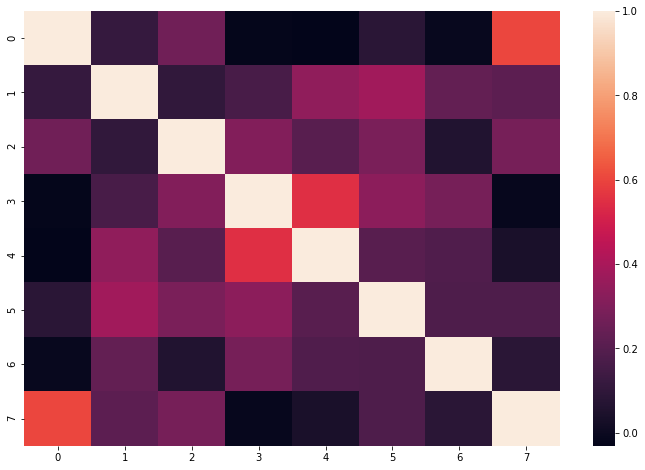

In [195]:
plt.figure(figsize = (12,8))
sns.heatmap(corrmat)

In [196]:
#Using tree based classifier
rf = RandomForestClassifier(n_estimators=100,random_state=0)
rf.fit(x_train_unique,y_train)

RandomForestClassifier(random_state=0)

In [197]:
features = x_train_unique.columns
importance = pd.concat([pd.Series(features),pd.Series(rf.feature_importances_)],axis = 1)
importance.columns = ['features','importance']
importance.sort_values(by = 'importance',ascending = False,inplace = True)
importance

,features,importance
1,1,0.368999
7,7,0.176801
5,5,0.143598
4,4,0.085175
0,0,0.067229
2,2,0.058064
6,6,0.056070
3,3,0.044064


In [198]:
train = x_train_unique.drop([2,3],axis = 1)
test = x_test_unique.drop([2,3],axis = 1)
train.shape,y_train.shape,test.shape,y_test.shape

((404, 6), (404,), (101, 6), (101,))

In [199]:
%%time
y_pred,model = randomForest(train,test,y_train,y_test)

Accuracy(Testing Data) : 
0.9405940594059405
CPU times: user 184 ms, sys: 16.8 ms, total: 201 ms
Wall time: 340 ms


In [200]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,HairColor,Adult,Country,Age_1
0,6,148,72,35,0,33.6,0.627,50,0,1,0,50
1,1,85,66,29,0,26.6,0.351,31,0,1,0,31
2,8,183,64,0,0,23.3,0.672,32,0,1,0,32
3,1,89,66,23,94,28.1,0.167,21,0,1,0,21
4,0,137,40,35,168,43.1,2.288,33,0,1,0,33
...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,1,1,0,63
764,2,122,70,27,0,36.8,0.340,27,1,1,0,27
765,5,121,72,23,112,26.2,0.245,30,1,1,0,30
766,1,126,60,0,0,30.1,0.349,47,1,1,0,47


In [201]:
train


,0,1,4,5,6,7
0,0.0,94.0,115.0,43.500000,0.347000,21.0
1,7.0,168.0,321.0,38.200000,0.787000,40.0
2,5.0,137.0,0.0,48.800000,0.227000,37.0
3,3.0,163.0,105.0,31.600000,0.268000,28.0
4,5.0,139.0,160.0,31.600000,0.361000,25.0
...,...,...,...,...,...,...
399,6.0,113.0,0.0,33.327330,0.258316,41.0
400,2.0,92.0,0.0,31.600000,0.130000,24.0
401,1.0,91.0,100.0,25.200000,0.234000,23.0
402,0.0,156.0,0.0,38.219939,0.735028,30.0
